# Comparing our models to predictions for Sydney Open 2019

Our last tournament in the dataset is Sydney Open - this is a lead up tournament for Australian Open. NOTE: this tournament data was not used as part of training or validation since we stopped our data at 2018, so it should give us a pretty good sense of whether the model is generalizing well to data we have not seen before.

Let's look at our 2 top models and run a prediction and see how well we are doing. These 2 models are Descision Tree Classifiers trained on diff dataset + ohe categorical data. One was trained on dataset from 1985 to 2018. The other trained on 1998 to 2018 data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper, REPORT_FILE, RSTATE, N_JOBS, MAX_ITER, LABEL_COL

%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d'
DATE = datetime.now().strftime(DATE_FORMAT)

DESCRIPTION = "diff-ohe-matchup_diff-1985-gridsearchCV"


# update this
FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features-diff-ohe.csv'

START_YEAR = 1985
END_YEAR = 2018

import logging
logging.basicConfig(level=logging.INFO)




In [2]:
report = pd.read_csv(REPORT_FILE)

In [3]:
features = pd.read_csv(FEATURE_FILE)

### Get Sydney Open Data

In [4]:
sydney_open = features[(features.tourney_year == 1998) & (features.tourney_id_label_107 == 1)]
sydney_open.head()

,age_diff,draw_size,ht_diff,p1_winner,rank_diff,round_label,seed_diff,tourney_level_label,tourney_month,tourney_year,...,p2_200611,p2_200615,p2_200624,p2_200630,p2_202090,p2_202130,p2_202358,p2_202359,p2_202385,p2_205734
42641,-5.69,64,13.0,0,323,6,17.00,4,7,1998,...,0,0,0,0,0,0,0,0,0,0
42642,-5.54,64,5.0,1,14,6,9.84,4,7,1998,...,0,0,0,0,0,0,0,0,0,0
42643,5.32,64,3.0,1,-30,6,-5.65,4,7,1998,...,0,0,0,0,0,0,0,0,0,0
42644,-0.16,64,-8.0,1,-87,6,-12.41,4,7,1998,...,0,0,0,0,0,0,0,0,0,0
42645,-4.08,64,-16.0,0,56,6,17.00,4,7,1998,...,0,0,0,0,0,0,0,0,0,0


In [5]:
sydney_open_labels = sydney_open[LABEL_COL]
print(sydney_open_labels.shape)
sydney_open_features = sydney_open.drop([LABEL_COL], axis=1)
print(sydney_open_features.shape)

(55,)
(55, 5251)


In [6]:
report.head()

,model_name,description,data_file,start_year,end_year,accuracy,roc_auc_score,confusion_matrix,classification_report,model_file,predict_time_min,fit_time_min,total_time_min
0,LogisticRegression,diff,../datasets/atp_matches_1985-2019_features-dif...,1998,2018,0.694868,0.695105,"{""0"": {""0"": 4909, ""1"": 1975}, ""1"": {""0"": 2544,...","{""Loss"": {""precision"": 0.713102847181871, ""rec...",../models/logisticregression-1998-2018-diff.pkl,0.0,0.0,0.0
1,KNeighborsClassifier,diff,../datasets/atp_matches_1985-2019_features-dif...,1998,2018,0.612559,0.612532,"{""0"": {""0"": 4596, ""1"": 2881}, ""1"": {""0"": 2857,...","{""Loss"": {""precision"": 0.6146850341045874, ""re...",../models/kneighborsclassifier-1998-2018-diff.pkl,0.0,0.0,0.0
2,DecisionTreeClassifier,diff,../datasets/atp_matches_1985-2019_features-dif...,1998,2018,0.922890,0.922874,"{""0"": {""0"": 6896, ""1"": 585}, ""1"": {""0"": 557, ""...","{""Loss"": {""precision"": 0.9218018981419597, ""re...",../models/decisiontreeclassifier-1998-2018-dif...,0.0,0.0,0.0
3,RandomForestClassifier,diff,../datasets/atp_matches_1985-2019_features-dif...,1998,2018,0.858609,0.858375,"{""0"": {""0"": 6667, ""1"": 1308}, ""1"": {""0"": 786, ...","{""Loss"": {""precision"": 0.835987460815047, ""rec...",../models/randomforestclassifier-1998-2018-dif...,0.0,0.0,0.0
4,GradientBoostingClassifier,diff,../datasets/atp_matches_1985-2019_features-dif...,1998,2018,0.868602,0.868462,"{""0"": {""0"": 6634, ""1"": 1127}, ""1"": {""0"": 819, ...","{""Loss"": {""precision"": 0.8547867542842417, ""re...",../models/gradientboostingclassifier-1998-2018...,0.0,0.0,0.0


# Predicting based on model trained with data from 1998 to 2018



Description: diff-ohe
Model Score: 0.9818181818181818

ROC/AUC Score: 0.9827586206896552
              precision    recall  f1-score   support

        Loss       0.96      1.00      0.98        26
         Win       1.00      0.97      0.98        29

    accuracy                           0.98        55
   macro avg       0.98      0.98      0.98        55
weighted avg       0.98      0.98      0.98        55

      Loss  Win
Loss    26    0
Win      1   28


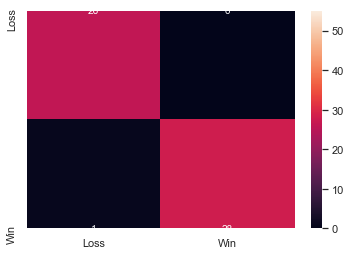

In [7]:
desc = "diff-ohe"

print(f'\n\nDescription: {desc}')
current_report = report[(report.model_name == 'DecisionTreeClassifier') &
                                  (report.description == desc)]
mw = ModelWrapper.get_model_wrapper_from_report(current_report)
mw.X_test = sydney_open_features
mw.y_test = sydney_open_labels
mw.predict()
mw.analyze()
plt.show()
    

# Predicting based on model trained with data from 1985 to 2018

In [8]:
import logging
logging.basicConfig(level=logging.INFO)

INFO:util.model_util:Loading model from file: ../models/decisiontreeclassifier-1985-2018-diff-ohe-1985.pkl




Description: diff-ohe-1985
Model Score: 0.9818181818181818

ROC/AUC Score: 0.9827586206896552
              precision    recall  f1-score   support

        Loss       0.96      1.00      0.98        26
         Win       1.00      0.97      0.98        29

    accuracy                           0.98        55
   macro avg       0.98      0.98      0.98        55
weighted avg       0.98      0.98      0.98        55

      Loss  Win
Loss    26    0
Win      1   28


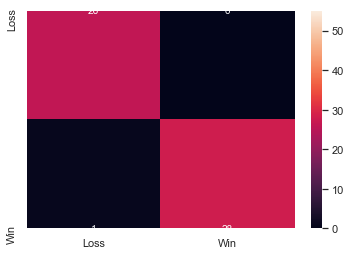

In [9]:
desc = "diff-ohe-1985"

print(f'\n\nDescription: {desc}')
current_report = report[(report.model_name == 'DecisionTreeClassifier') &
                                  (report.description == desc)]
mw1985 = ModelWrapper.get_model_wrapper_from_report(current_report)
mw1985.X_test = sydney_open_features
mw1985.y_test = sydney_open_labels
mw1985.predict()
mw1985.analyze()
plt.show()
    

## Both models predicted the same match incorrectly

Let's look at which match and why we go the prediction wrong

In [10]:
wrong_list = (sydney_open_labels != mw.y_predict)
wrong_idx = [i for i, x in enumerate(wrong_list) if x]
sydney_open_features[wrong_list]                

,age_diff,draw_size,ht_diff,rank_diff,round_label,seed_diff,tourney_level_label,tourney_month,tourney_year,p1_hand_l,...,p2_200611,p2_200615,p2_200624,p2_200630,p2_202090,p2_202130,p2_202358,p2_202359,p2_202385,p2_205734
42650,10.09,64,10.0,-114,6,-12.0,4,7,1998,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
wrong_list1985 = (sydney_open_labels != mw1985.y_predict)
wrong_idx1985 = [i for i, x in enumerate(wrong_list1985) if x]
sydney_open_features[wrong_list1985]

,age_diff,draw_size,ht_diff,rank_diff,round_label,seed_diff,tourney_level_label,tourney_month,tourney_year,p1_hand_l,...,p2_200611,p2_200615,p2_200624,p2_200630,p2_202090,p2_202130,p2_202358,p2_202359,p2_202385,p2_205734
42650,10.09,64,10.0,-114,6,-12.0,4,7,1998,1,...,0,0,0,0,0,0,0,0,0,0


### Looks like both models got the wrong prediction for the same entry

Let's use shap to figure out what each model is doing

In [12]:
X_train, X_test, y_train, y_test = \
    ju.get_data(FEATURE_FILE, LABEL_COL, 1998, END_YEAR)

INFO:util.jupyter_util:loading ../datasets/atp_matches_1985-2019_features-diff-ohe.csv
INFO:util.jupyter_util:(59239, 5251)


In [13]:
import shap

shap.initjs()


explainer = shap.TreeExplainer(mw.model, data=X_train.values)
# should I be using the test dataset?
shap_values = explainer.shap_values(sydney_open_features.values)
shap_df = pd.DataFrame(shap_values[1], columns=X_train.columns)


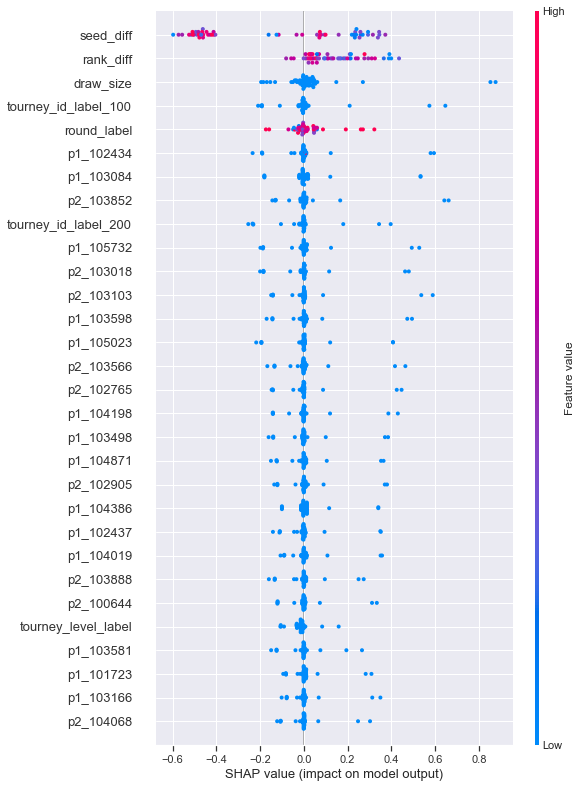

In [14]:
shap.summary_plot(shap_values[1], sydney_open_features, max_display=30)

## Even though our player 1 is seeded and ranked much higher than player 2, our model is predicting that player 1 will lose

For some reasong seed diff has a SHAP value of -0.5 which pushes our model towards predicting a loss for player 1

In [30]:
# shap.force_plot(explainer.expected_value[1], shap_values[1][false_idx2][:], X_test_unmapped.iloc[false_idx2,:], feature_names=X_test.columns)

print('Predicted Loss' if mw.y_predict[wrong_idx[0]] == 0 else 'Predicted Win')
print('Actual Loss' if y_test.iloc[wrong_idx[0]] == 0 else 'Actual Win')
# print(y_test.iloc[wrong_idx[0]])

shap.force_plot(explainer.expected_value[1], 
                     shap_values[1][wrong_idx[0]][:], 
                     sydney_open_features.iloc[wrong_idx[0]], 
                     sydney_open_features.columns)

Predicted Loss
Actual Win


In [16]:
sydney_open_features[wrong_list]

,age_diff,draw_size,ht_diff,rank_diff,round_label,seed_diff,tourney_level_label,tourney_month,tourney_year,p1_hand_l,...,p2_200611,p2_200615,p2_200624,p2_200630,p2_202090,p2_202130,p2_202358,p2_202359,p2_202385,p2_205734
42650,10.09,64,10.0,-114,6,-12.0,4,7,1998,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
shap_df.shape

(55, 5251)

In [18]:
shap_df.iloc[wrong_idx[0]][["seed_diff", "rank_diff", "p2=102401"]]

//anaconda3/envs/capstone2/lib/python3.7/site-packages/pandas/core/series.py:1152: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


seed_diff   -0.516360
rank_diff    0.092098
p2=102401         NaN
Name: 9, dtype: float64

## Let's look at our model with data trained from 1985 and see if shap values are the same

With this model, draw size, age difference, and player 2 location seems to have great effect on the model than seed and rank difference

<font color="red">There is something wrong here. The shap values are not matching up with our predictions</font>

In [19]:
X_train1985, X_test1985, y_train1985, y_test1985 = \
    ju.get_data(FEATURE_FILE, LABEL_COL, 1985, END_YEAR)

INFO:util.jupyter_util:loading ../datasets/atp_matches_1985-2019_features-diff-ohe.csv
INFO:util.jupyter_util:(99901, 5251)


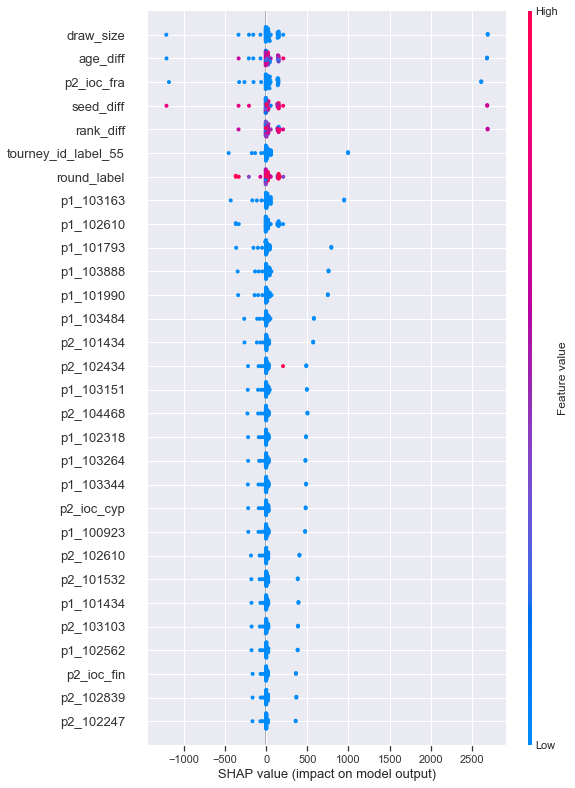

In [20]:

# explainer = shap.TreeExplainer(mw.model, data=X_train.values)
# # should I be using the test dataset?
# shap_values = explainer.shap_values(sydney_open_features.values)
# shap_df = pd.DataFrame(shap_values[1], columns=X_train.columns)


explainer1985 = shap.TreeExplainer(mw1985.model, data=X_train1985.values)
# should I be using the test dataset?
shap_values1985 = explainer1985.shap_values(sydney_open_features.values)
shap_df1985 = pd.DataFrame(shap_values1985[1], columns=X_train1985.columns)
shap.summary_plot(shap_values1985[1], sydney_open_features, max_display=30)

In [21]:
shap_df1985.iloc[wrong_idx1985[0]][["age_diff", "draw_size", "rank_diff", "p1_102610", "round_label", "p2_ioc_fra"]]

age_diff       19.853803
draw_size      19.701761
rank_diff      19.628646
p1_102610      19.542229
round_label    19.529612
p2_ioc_fra     19.437448
Name: 9, dtype: float64

In [22]:
idx = wrong_idx1985[0]

print('Predicted Loss' if mw1985.y_predict[idx] == 0 else 'Predicted Win')
print('Actual Loss' if sydney_open_labels.iloc[idx] == 0 else 'Actual Win')

print(f'Expected Value: {explainer1985.expected_value}')

shap.force_plot(explainer1985.expected_value[1], 
                     shap_values1985[1][idx][:], 
                     sydney_open_features.iloc[idx], 
                     sydney_open_features.columns)

Predicted Loss
Actual Win
Expected Value: [0.49997997997998, 0.50002002002002]


In [23]:
np.shape(shap_values1985[1])

(55, 5251)

In [24]:
shap_values1985[1][idx][:].tolist()

[19.853802626008054,
 19.701760885012405,
 0.0007817411642287625,
 19.628646010781768,
 19.529611738370097,
 18.996996995964523,
 -0.00042219213458690824,
 -0.0004517375389417642,
 -0.001713620661257654,
 -6.044265829943622e-05,
 0.0002439145104764541,
 1.222616683262124e-05,
 -4.111790548365022e-05,
 -0.0002085814820081859,
 -6.056084337059422e-06,
 0.0001481526046200305,
 -0.0004909697342702306,
 5.731101609449651e-06,
 8.856698059214732e-06,
 0.0,
 -1.4454853013473307e-05,
 5.049094686562063e-06,
 -2.3834693964817823e-05,
 5.515949941814788e-05,
 0.0,
 -5.2383184042592835e-05,
 6.636824025030688e-06,
 1.8731642437897673e-06,
 0.0,
 0.0,
 -9.210289447649829e-06,
 -4.451200855073609e-06,
 0.0,
 -1.3223435579571773e-05,
 0.0,
 1.9798553961504545e-06,
 7.206195964445897e-06,
 0.0,
 0.0,
 -2.5771051956997887e-06,
 0.0,
 -1.8118279545947173e-05,
 0.0,
 -8.149856398933178e-06,
 -4.840383133303e-06,
 0.0,
 4.206673914563513e-05,
 4.516111935810211e-06,
 0.0,
 0.0,
 7.517209371953935e-05,
 0.0,
 3.1945804807150273e-06,
 -0.00012930748923940417,
 0.00010516103813118818,
 -2.7745182110525008e-06,
 -7.216349430744233e-05,
 1.2473485022249739e-05,
 0.0,
 0.0,
 3.6521262678952786e-05,
 0.0,
 0.0,
 0.0,
 0.0,
 5.668105614277201e-06,
 -0.00040471328629299605,
 0.0,
 -2.2335906746485337e-06,
 0.0,
 0.0,
 -4.854170323195199e-06,
 0.0,
 -4.390403035207746e-06,
 -4.5635781463834865e-06,
 0.0,
 -1.0975655176333802e-05,
 0.0,
 0.0,
 -4.504727098180929e-06,
 0.0,
 0.0,
 -6.301579884955147e-05,
 -3.33667000333667e-06,
 -4.45137156618752e-06,
 -0.00011348396293437727,
 0.0,
 -1.2062172427726633e-05,
 1.0209076976987425e-05,
 -3.247104078553966e-06,
 0.0,
 0.0,
 0.0,
 0.0,
 -2.5397644395069925e-06,
 1.0192271806280633e-05,
 -9.594602307045491e-06,
 0.0,
 0.0,
 -6.621153173761905e-06,
 -7.447768029823131e-05,
 5.654388477817181e-06,
 -8.646013459043422e-05,
 0.0,
 0.0,
 -2.728325586992928e-06,
 0.0,
 0.0,
 0.0,
 2.8059821709466976e-06,
 0.0,
 2.055835696737824e-06,
 0.0001562219706322214,
 0.0,
 0.0,
 0.0,
 0.0,
 -4.448893337782229e-06,
 0.0,
 -2.528069339761592e-05,
 0.7164168724608659,
 -0.010116077865858627,
 6.430385255987057e-06,
 0.0,
 0.0,
 0.0,
 -8.932141213387768e-08,
 0.0,
 0.0,
 0.0,
 -1.942120449547864e-06,
 0.0,
 -4.236569392455236e-05,
 -1.876252171963048e-06,
 1.2717812217043556e-05,
 0.0,
 -8.070335677223033e-05,
 0.0,
 -2.5031101091820667e-06,
 -5.0908738688899685e-06,
 4.6342816512549564e-07,
 0.0,
 3.8276961708939985,
 -7.356731656220174e-05,
 3.115079618237385e-06,
 -2.350774754401564e-06,
 0.0,
 0.0,
 0.0,
 -0.0009626829780592908,
 0.0,
 2.794730076063494,
 19.437448024273543,
 -0.0015471821852393204,
 0.0,
 7.675831929465826e-06,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -8.07393890777917e-06,
 0.0,
 0.0,
 -3.918047599664784e-06,
 1.0106792773481229e-05,
 0.0,
 0.0,
 1.3387956298033165e-05,
 1.1511223954687124e-05,
 6.6901187311378715e-06,
 0.0,
 -3.0932617827964983e-06,
 0.0,
 0.0,
 -1.754219220758851e-05,
 0.0,
 0.0,
 1.4489453409035717e-05,
 0.0,
 0.0,
 -2.2222653852418156e-06,
 0.0,
 -4.59700538332353e-06,
 0.0,
 0.0,
 4.21790017580237e-06,
 2.783082496453874e-06,
 0.0,
 1.4160162982561024,
 0.0,
 0.0,
 0.0,
 -2.672589306755466e-06,
 8.444436011430005e-05,
 -0.0001274925211546022,
 0.0,
 2.2313868506778956e-06,
 0.0,
 5.7609085992558215e-06,
 2.5680180951757914e-06,
 -4.716398906222001e-05,
 0.0,
 0.0,
 0.6847309299343705,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -2.04588147799287e-06,
 3.7673926095023654e-07,
 -2.22314822231989e-05,
 -1.8663025115199428e-06,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.5683415242111117e-05,
 0.0,
 0.0,
 1.9060490381023549e-06,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.759335997985887e-06,
 0.0,
 0.0,
 0.0,
 -6.76428166603315e-05,
 1.4940256729963947e-05,
 0.0,
 0.0,
 -9.412894716661097e-06,
 0.0,
 0.0,
 0.0,
 -3.4357283580461283e-06,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.3904531610256454e-05,
 0.0,
 1.3912477736902574e-05,
 -3.8204733950469504e-06,
 0.0,
 0.0,
 2.951824072560129e-06,
 0.0,
 0.0,
 0.0,

In [25]:
mw1985.y_test.head(10)

42641    0
42642    1
42643    1
42644    1
42645    0
42646    1
42647    1
42648    1
42649    1
42650    1
Name: p1_winner, dtype: int64

In [26]:
sydney_open_labels[:10]

42641    0
42642    1
42643    1
42644    1
42645    0
42646    1
42647    1
42648    1
42649    1
42650    1
Name: p1_winner, dtype: int64

In [27]:
y_test.iloc[9]

1

In [28]:
mw1985.y_predict[:10]

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [29]:
sydney_open_labels.iloc[9]

1